<a href="https://colab.research.google.com/github/Hatsuhinode/Feature-Engineering/blob/main/Arbitrary_Value_Imputation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 2.58MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# Handling missing values

## Arbitrary value imputation.

Arbitrary value imputation is a technique used to replace missing values in a dataset with an arbitrary or pre-defined constant value.



 It is applied to categorical or numerical data where the missingness does not carry significant information and the missing values are not systematically related to the data.



When the missingness in the data occurs randomly (MCAR) and has no correlation with other variables, using arbitrary values can be a simple way to handle these missing values.

In [ ]:
titanicDataframe = pd.read_csv('train.csv')
titanicDataframe.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
titanicDataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanicDf = pd.read_csv('train.csv', usecols = ['PassengerId','Age','Fare','Survived'])
titanicDf.head(6)

,PassengerId,Survived,Age,Fare
0,1,0,22.0,7.2500
1,2,1,38.0,71.2833
2,3,1,26.0,7.9250
3,4,1,35.0,53.1000
4,5,0,35.0,8.0500
5,6,0,NaN,8.4583


In [ ]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   Fare         891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
titanicDf.isnull().sum()

PassengerId      0
Survived         0
Age            177
Fare             0
dtype: int64

In [ ]:
titanicDf.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Age            0.198653
Fare           0.000000
dtype: float64

In [ ]:
def Imputation(dataframe, feature, imputationMethod, ArbitraryValue):
    dataframe[feature + 'Median'] = dataframe[feature].fillna(imputationMethod)
    dataframe[feature + 'Arbitrary'] = dataframe[feature].fillna(ArbitraryValue)



In [ ]:
median = titanicDf['Age'].median()
ArbitraryValue = 10
Imputation(titanicDf, 'Age', median,ArbitraryValue)

In [ ]:
print('The median of "Age" data in titanicDf is : ', median)

The median of "Age" data in titanicDf is :  28.0


In [ ]:
titanicDf.head(7)

,PassengerId,Survived,Age,Fare,AgeMedian,AgeArbitrary
0,1,0,22.0,7.2500,22.0,22.0
1,2,1,38.0,71.2833,38.0,38.0
2,3,1,26.0,7.9250,26.0,26.0
3,4,1,35.0,53.1000,35.0,35.0
4,5,0,35.0,8.0500,35.0,35.0
5,6,0,NaN,8.4583,28.0,10.0
6,7,0,54.0,51.8625,54.0,54.0


### Variation in standard deviation in data of 'Age', 'AgeMedian' and 'AgeArbitrary' column

In [ ]:
print('The standard deviation of data in column "Age" is : ',titanicDf['Age'].std())
print('The standard deviation of data in column "AgeMedian" is : ',titanicDf['AgeMedian'].std())
print('The standard deviation of data in column "AgeArbitrary" is : ',titanicDf['AgeArbitrary'].std())

The standard deviation of data in column "Age" is :  14.526497332334042
The standard deviation of data in column "AgeMedian" is :  13.019696550973201
The standard deviation of data in column "AgeArbitrary" is :  15.195274378831163


### Graphical representation of data in 'Age', 'AgeMedian' and 'AgeArbitrary' column

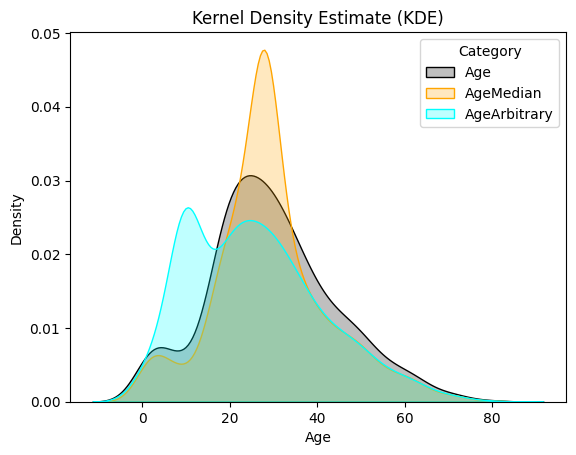

In [ ]:
sns.kdeplot(titanicDf['Age'],color = 'black', fill=True, label = 'Age')
sns.kdeplot(titanicDf['AgeMedian'],color = 'orange', fill=True, label = 'AgeMedian')
sns.kdeplot(titanicDf['AgeArbitrary'],color = 'aqua', fill=True, label = 'AgeArbitrary')

plt.title('Kernel Density Estimate (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Category')

plt.show()

---

#### Histogram

##### Plot of AgeArbitrary

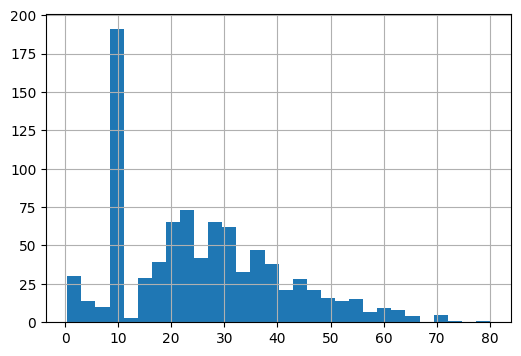

In [ ]:
fig = plt.figure(figsize = (6,4))
titanicDf['AgeArbitrary'].hist(bins = 30);